In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
'''示例1：计算分组加权平均数和相关系数'''
data_px=pd.read_csv('stock_px.csv',parse_dates=True,index_col=0)
data_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [27]:
'''pct_change()函数：计算日收益率。
                    默认是按行计算，公式=上下两行数据的差值/前一天的数据值。对于第一行的数据设置其为NaN'''
data_px.pct_change().dropna()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
2003-01-10,0.002725,0.001824,-0.013927,0.000000
2003-01-13,-0.005435,0.008648,-0.004134,-0.001412
2003-01-14,-0.002732,0.010379,0.008993,0.005830
2003-01-15,-0.010959,-0.012506,-0.013713,-0.014426
2003-01-16,0.012465,-0.016282,0.004519,-0.003942


In [34]:
spx_corr=lambda x:x.corrwith(x['SPX'])
data_year=data_px.groupby(lambda x:x.year).apply(spx_corr) #将数据按年进行聚合，计算与‘SPX’的相似度
data_year

,AAPL,MSFT,XOM,SPX
2003,0.882692,0.675932,0.860104,1.0
2004,0.638080,0.593300,0.432642,1.0
2005,0.743263,0.746188,0.404042,1.0
2006,0.838252,0.824727,0.849528,1.0
2007,0.483093,0.292706,0.729426,1.0
2008,0.829417,0.919476,0.774885,1.0
2009,0.952895,0.950194,0.278447,1.0
2010,0.617886,0.469280,0.894656,1.0
2011,-0.552395,0.111688,0.912603,1.0


In [32]:
#还可以计算列与列之间的相似度
data_col=data_px.groupby(lambda x:x.year).apply(lambda y:y['AAPL'].corr(y['XOM'])) #corr() return一个标量，corrwith() return一个Series
data_col

2003    0.752438
2004    0.914455
2005    0.322278
2006    0.684385
2007    0.900628
2008    0.645485
2009    0.060317
2010    0.395249
2011   -0.430455
dtype: float64

In [81]:
'''示例2:2012联邦选举委员会数据库'''
data_fec=pd.read_csv('P00000001-ALL.csv',parse_dates=True)
data_fec.ix[1]

D:\PyCharm\python3.5.3\lib\site-packages\IPython\core\interactiveshell.py:2683: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                   3.6601e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                    50
contb_receipt_dt              23-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 1, dtype: object

In [82]:
#获取出全部候选人的信息
cands=data_fec.cand_nm.unique()
cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [83]:
#数据中无候选人的党派关系，自建一个映射字典加入数据中
parties={"Bachmann, Michelle":'Republican', "Romney, Mitt":'Republican', "Obama, Barack":'Democrat',
         "Roemer, Charles E. 'Buddy' III":'Republican', "Pawlenty, Timothy":'Republican', "Johnson, Gary Earl":'Republican',
         "Paul, Ron":'Republican', "Santorum, Rick":'Republican', "Cain, Herman":'Republican', "Gingrich, Newt":'Republican',
         "McCotter, Thaddeus G":'Republican', "Huntsman, Jon":'Republican', "Perry, Rick":'Republican'}
data_fec['parties']=data_fec.cand_nm.map(parties)
data_fec['parties'].value_counts()

Democrat      593746
Republican    407985
Name: parties, dtype: int64

In [98]:
#数据中包括赞助也包括退款(负的出资额)，为了方便分析，只统计正的出资额
print((data_fec.contb_receipt_amt>0).value_counts())
data_fec_xg=data_fec[data_fec.contb_receipt_amt > 0]

True    991475
Name: contb_receipt_amt, dtype: int64


In [100]:
#根据职业计算出资总额
data_fec_xg.contbr_occupation.value_counts()[:]
#许多职业都涉及相同的基本工作类型，下面清理一些职业的数据(映射到另一个)
occ_mapping = {"INFORMATION REQUESTED":"NOT PROVIDED","INFORMATION REQUESTED PER BEST EFFORTS":"NOT PROVIDED",
               "INFORMATION REQUESTED(BEST EFFORTS)":"NOT PROVIDED","C.E.O.":"CEO"}
#使用dict.get()函数，没有相关映射的职业直接返回x
data_fec_xg.contbr_occupation = data_fec_xg.contbr_occupation.map(lambda x:occ_mapping.get(x,x))

In [101]:
#对雇主信息也做同样的处理
emp_mapping = {"INFORMATION REQUESTED":"NOT PROVIDED","INFORMATION REQUESTED PER BEST EFFORTS":"NOT PROVIDED",
               "SELF":"SELF-EMPLOYED","SELF EMPLOYED":"SELF-EMPLOYED"}
data_fec_xg.contbr_employer = data_fec_xg.contbr_employer.map(lambda x:emp_mapping.get(x,x))

parties               Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.023715e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06


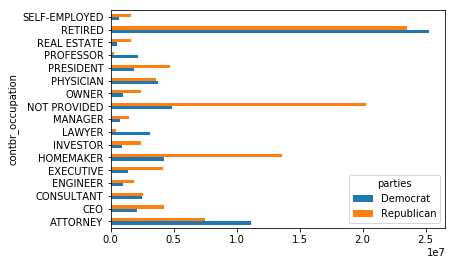

In [106]:
#根据党派和职业对数据进行聚合，过滤总出资额不足200万美元的数据
data_occupation=data_fec_xg.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='parties',aggfunc=sum)
result1=data_occupation[data_occupation.sum(1)>2000000]
print(result1)
result1.plot(kind='barh')
plt.show()

In [113]:
'''对每位候选人，计算对其总出资额最高的职业和企业'''
def get_topN(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.order(ascending=False)[:5]

gb1=data_fec_xg.groupby('cand_nm').apply(get_topN,'contbr_occupation',n = 10)
gb1

D:\PyCharm\python3.5.3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: order is deprecated, use sort_values(...)
  after removing the cwd from sys.path.


cand_nm                         contbr_occupation                   
Bachmann, Michelle              RETIRED                                   854785.17
                                NOT PROVIDED                              149354.00
                                HOMEMAKER                                 105622.00
                                PHYSICIAN                                  77319.00
                                PRESIDENT                                  68831.00
Cain, Herman                    NOT PROVIDED                             3725749.37
                                RETIRED                                   844671.47
                                HOMEMAKER                                 173888.07
                                PHYSICIAN                                 140190.96
                                CEO                                       139996.00
Gingrich, Newt                  RETIRED                                  3207514.38
       

In [117]:
'''对出资额分组：利用cut()函数对出资额的大小将数据离散化到多个面元中'''
bins=np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels=pd.cut(data_fec_xg.contb_receipt_amt,bins)
gb2=data_fec_xg.groupby(['cand_nm',labels])
gb2.size().unstack(0)

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_amt,,,,,,,,,,,,,
"(0, 1]",98.0,23.0,17.0,NaN,1.0,NaN,493.0,23.0,1.0,NaN,12.0,77.0,13.0
"(1, 10]",118.0,578.0,744.0,120.0,30.0,1.0,40070.0,2390.0,8.0,14.0,768.0,3681.0,637.0
"(10, 100]",7480.0,7331.0,26466.0,918.0,446.0,12.0,372280.0,99957.0,324.0,1044.0,5053.0,31853.0,28231.0
"(100, 1000]",5121.0,11315.0,17961.0,2170.0,645.0,55.0,153991.0,39333.0,1800.0,5039.0,11.0,43357.0,15989.0
"(1000, 10000]",265.0,805.0,1695.0,858.0,112.0,5.0,22284.0,1456.0,1711.0,6612.0,NaN,26186.0,1375.0
"(10000, 100000]",NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN
"(100000, 1000000]",NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1000000, 10000000]",NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
'''根据州统计赞助信息'''
gb3=data_fec_xg.groupby(['cand_nm','contbr_st'])
totals=gb3.contb_receipt_amt.sum().unstack(0).fillna(0)
totals=totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contbr_st,,,,,,,,,,,,,
AE,1750.00,1005.00,7025.00,300.0,0.00,0.0,42973.75,54254.83,0.00,1550.00,410.00,5680.00,3230.00
AK,8235.50,30653.92,31091.00,2500.0,2350.00,0.0,281840.15,128874.09,250.00,3900.00,750.00,86204.24,23011.97
AL,25812.00,94236.87,190075.00,4500.0,4200.00,0.0,543123.48,220539.24,20300.00,34474.96,5958.24,527303.51,185646.18
AR,19156.00,55411.02,66538.00,13604.0,500.00,0.0,359247.28,116612.21,15850.00,29565.00,2011.00,105556.00,47683.25
AZ,64472.00,241891.63,254536.62,60618.0,9650.00,0.0,1506476.98,546020.56,107575.00,84374.00,6686.12,1888436.23,188250.17
CA,360100.77,569695.91,1387466.13,415345.0,84784.88,1030.0,23824984.24,2826012.18,1130330.00,1720880.60,38783.17,11237636.60,995180.83
CO,59754.65,130164.66,206939.88,20525.0,39980.00,0.0,2132429.49,469009.77,137327.54,233033.33,4580.00,1506714.12,313747.81
CT,32765.00,69998.12,168600.00,93498.0,7925.00,0.0,2068291.26,268674.12,95300.00,64250.00,4665.00,3499475.45,86600.59
DC,3085.00,9970.00,35810.00,94267.5,6500.00,0.0,4373538.80,43087.33,36990.00,78900.00,2120.00,1025137.50,30382.24


In [121]:
#对各行除以总赞助额，得到各州的总赞助额百分比
percent=totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contbr_st,,,,,,,,,,,,,
AE,0.014808,0.008504,0.059444,0.002539,0.000000,0.000000,0.363634,0.459092,0.000000,0.013116,0.003469,0.048063,0.027332
AK,0.013734,0.051119,0.051848,0.004169,0.003919,0.000000,0.469999,0.214912,0.000417,0.006504,0.001251,0.143755,0.038375
AL,0.013906,0.050770,0.102402,0.002424,0.002263,0.000000,0.292604,0.118814,0.010937,0.018573,0.003210,0.284082,0.100016
AR,0.023031,0.066621,0.079999,0.016356,0.000601,0.000000,0.431926,0.140204,0.019057,0.035546,0.002418,0.126911,0.057330
AZ,0.013001,0.048778,0.051328,0.012224,0.001946,0.000000,0.303787,0.110107,0.021693,0.017014,0.001348,0.380811,0.037961
CA,0.008075,0.012776,0.031115,0.009314,0.001901,0.000023,0.534286,0.063375,0.025348,0.038591,0.000870,0.252009,0.022317
CO,0.011373,0.024773,0.039386,0.003906,0.007609,0.000000,0.405852,0.089264,0.026137,0.044352,0.000872,0.286763,0.059714
CT,0.005072,0.010836,0.026099,0.014473,0.001227,0.000000,0.320167,0.041590,0.014752,0.009946,0.000722,0.541711,0.013406
DC,0.000537,0.001737,0.006239,0.016424,0.001132,0.000000,0.761969,0.007507,0.006444,0.013746,0.000369,0.178602,0.005293
